NameError: name 'pred_table' is not defined

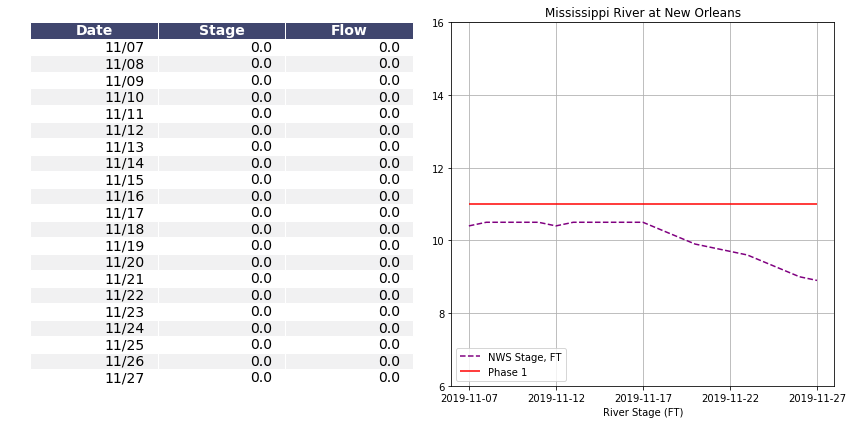

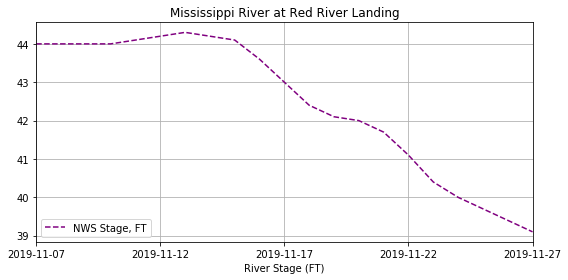

In [21]:
import requests as req
import urllib.request as urlreq
import time
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import ntpath

# NWS Observations and Forecasts for the Lower Mississippi/Ohio site
nws = req.get('https://www.weather.gov/lmrfc/obsfcst_mississippi')

# Parse html data from website
nws_html = BeautifulSoup(nws.text, "html.parser") # NOTE: data is pre-formatted <pre>

###################### Get 5-day forecast data ##########################
dum = nws_html.findAll('a')[118]
pred_5day = dum['href']
html_5day = BeautifulSoup(req.get(pred_5day).text, "html.parser")
text_5day = html_5day.find('pre').contents[0]

# Separate the rows specified in the data by \n
split_5day = text_5day.string.split('\n') # rows are separated by \n
# Separate items in row (space)
list_5day = [[]] * np.size(split_5day)
for i in range(np.size(split_5day)):
    list_5day[i] = split_5day[i].split() # separate each entry within the row

# Combine city names into one cell if multiple words (e.g., Baton Rouge, New Orleans)
for i in range(np.size(list_5day)):
    try:
        list_5day[i][0]
        if list_5day[i][0] == '':
            next
        elif list_5day[i][1] == '':
            next
        elif list_5day[i][0] == 'STATION':
            next    
        elif list_5day[i][0] == 'STG':
            list_5day[i].insert(0,'')
            list_5day[i].insert(1,'')
        elif list_5day[i][1].isnumeric():
            list_5day[i][1] = list_5day[i][1]
        elif list_5day[i][1].isalpha():
            list_5day[i][0] = list_5day[i][0] + ' ' + list_5day[i][1]
            del list_5day[i][1]
    except:
        continue


# Combine city names into one cell if more than two words (e.g., Red River Landing)
for i in range(np.size(list_5day)):
    try:
        list_5day[i][0]
        if list_5day[i][0] == '':
            next
        elif list_5day[i][1] == '':
            next
        elif list_5day[i][0] == 'STATION':
            next
        elif list_5day[i][1] == 'TDA':
            next
        elif list_5day[i][1].isnumeric():
            list_5day[i][1] = fcst_5day[i][1]
        elif list_5day[i][1].isalpha():
            list_5day[i][0] = list_5day[i][0] + ' ' + list_5day[i][1]
            del list_5day[i][1]
    except:
        continue

# Put list into dataframe
fcst_5day = pd.DataFrame(list_5day)



# Pause so website doesn't think we're a hacker (probably more relevant for loops)
time.sleep(1)

##################### Get 28-day forecast data ############################
dum = nws_html.findAll('a')[119]
pred_28day = dum['href']
html_28day = BeautifulSoup(req.get(pred_28day).text, "html.parser")
text_28day = html_28day.findAll('pre')[0]
# Separate the rows specified in the data by \n
split_28day = text_28day.string.split('\n') # rows are separated by \n
list_28day = [[]] * np.size(split_28day)
for i in range(np.size(split_28day)):
    list_28day[i]=split_28day[i].split() # separate each entry within the row


# Put list into data frame
fcst_28day = pd.DataFrame(list_28day)

# ############################### Plot Stages ##########################
# fcst28 = np.array(fcst_28day)
# k, l = np.where(fcst28=="NORL1") # used k and l as indices since i,j had been used

# dates_fcst21 = [datetime.strptime(x, "%m-%d-%y").date() for x in fcst28[int(k)+1:int(k)+22,0]]


# plt.figure(figsize=[8,4])
# fcst_28to_plot = np.float64(fcst28[int(k)+1:int(k)+21+1,int(l)])
# plt.plot_date(dates_fcst21,fcst_28to_plot,fmt='--', color='purple',xdate=True,ydate=False)
# if np.max(fcst_28to_plot) >= 14:
#     plt.ylim((0, 20))
# elif np.max(fcst_28to_plot) >= 10 and np.max(fcst_28to_plot) < 14:
#     plt.ylim((0, 16))
# elif np.max(fcst_28to_plot) < 10:
#     plt.ylim((0, 12))
# # plt.ylim(bottom=0)
# plt.xlim((dates_fcst21[0],dates_fcst21[-1]))
# plt.hlines(11, dates_fcst21[0],dates_fcst21[-1], colors = 'r')
# plt.gca().set
# # plt.gca().invert_yaxis()
# plt.grid(True)
# plt.xticks(dates_fcst21 )
# plt.xticks(dates_fcst21[0:21:5],dates_fcst21[0:21:5] )
# plt.legend(['NWS Stage, FT','Phase 1'],loc="lower left")
# plt.title("Mississippi River at New Orleans")
# plt.tight_layout()

# #
# from datetime import date
# import os

# # Get today's date 
# today = date.today()
# # Day, month abbreviation, and year
# today_ddmmyyyy = today.strftime("%d%b%Y")
# today_yy_mm_dd = today.strftime("%y-%m-%d")

# today_date = today_ddmmyyyy#today_yy_mm_dd

# file_out28 = "K:\\H&H1\\WTR-MGT\\FORECAST\\test_toolbox\\"  + today_yy_mm_dd + "\\test_24hr change NWS_" + today_ddmmyyyy + ".csv"
# path_out28 = ntpath.dirname(file_out28)
# pd.DataFrame.to_csv(fcst_28day, path_out28 + "\\" + "test_24hr change NWS_" + today_date + ".csv", date_format='%mm-%dd-%YY')

# plt.savefig(path_out28 + "\\" + "test_24hr_change_NWS_" + today_date  + ".png")
# plt.show()

import six


def render_mpl_table(data, col_width=2.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w'), 
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax


from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('C:\\Users\\b2edhdf9\\Downloads\\output2.pdf') as export_pdf:
    ############################### Plot Stages for New Orleans ##########################
    fcst28 = np.array(fcst_28day)
    k, l = np.where(fcst28=="NORL1") # used k and l as indices since i,j had been used

    dates_fcst21_NO = [datetime.strptime(x, "%m-%d-%y").date() for x in fcst28[int(k)+1:int(k)+22,0]]

    ######## Plot river stage forecast for 21 days
    #     plt.figure()#figsize=[8,4])
    plt.figure(figsize=[12,6])


    # MISSISSIPPI RIVER AT NEW ORLEANS 21-DAY FORECAST TABLE
    # Get the dates
    time_pred21 = [datetime.strptime(x, "%m-%d-%y").date() for x in fcst28[int(k)+1:int(k)+22,0]]
    dates_pred21 = [datetime.strftime(x, "%m/%d") for x in time_pred21] # this is what goes in table

    stage_no = np.zeros(21)
    flow_no = np.zeros(21)

    fcst_hdr = ["Date","Stage","Flow"]

    pred_no = list(zip(dates_pred21,stage_no,flow_no))

    # Plot table
    pred_NO21 = pd.DataFrame(pred_no, columns = fcst_hdr)
#     asdf = render_mpl_table(pred_NO21, header_columns=0, col_width=1.0, ax=plt.subplot(1,2,1))
    table_NO = render_mpl_table(pred_NO21,col_width=0.5,ax=plt.subplot(1,2,1))
    table_NO.axis('off')
    
    # Plot time series
    plt.subplot(1,2,2)
# plt.plot(fcst_28_NO)

    fcst_28_NO = np.float64(fcst28[int(k)+1:int(k)+21+1,int(l)])
    plt.plot_date(dates_fcst21_NO,fcst_28_NO,fmt='--', color='purple',xdate=True,ydate=False)
    # Add condtionals for the y-limits to adjust for scaling
    if np.max(fcst_28_NO) >= 14:
        plt.ylim((10, 20))
    elif np.max(fcst_28_NO) >= 10 and np.max(fcst_28_NO) < 14:
        plt.ylim((6, 16))
    elif np.max(fcst_28_NO) < 10:
        plt.ylim((2, 12))

    plt.hlines(11, dates_fcst21_NO[0],dates_fcst21_NO[-1], colors = 'r') # Stage 1 Flood Marker
    plt.gca().set
    plt.grid(True)
    plt.xticks(dates_fcst21_NO )
    plt.xticks(dates_fcst21_NO[0:21:5],dates_fcst21_NO[0:21:5] )
    plt.legend(['NWS Stage, FT','Phase 1'],loc="lower left")
    plt.title("Mississippi River at New Orleans")
    plt.xlabel("River Stage (FT)")
    
#     table_NO = plt.table(cellText=pred_no,
# #                       rowLabels=dates_pred21,
# #                       rowColours=colors,
#                       colLabels= fcst_hdr,
#                       loc='right')
    
    plt.tight_layout()
#     export_pdf.savefig()
#     plt.close()
    # plt.savefig(path_out28 + "\\" + "test_24hr_change_NWS_NewOrleans_" + today_date  + ".png")

    del k, l
    ############################### Plot Stages for Red River Landing ##########################
    fcst28 = np.array(fcst_28day)
    k, l = np.where(fcst28=="RRLL1") # used k and l as indices since i,j had been used

    dates_fcst21_RR = [datetime.strptime(x, "%m-%d-%y").date() for x in fcst28[int(k)+1:int(k)+22,0]]

    ######## Plot river stage forecast for 21 days
    plt.figure(figsize=[8,4])
    fcst_28_RR = np.float64(fcst28[int(k)+1:int(k)+21+1,int(l)])
    plt.plot_date(dates_fcst21_RR,fcst_28_RR,fmt='--', color='purple',xdate=True,ydate=False)
    # Add condtionals for the y-limits to adjust for scaling
    #     if np.max(fcst_28_RR) >= 14:
    #         plt.yli_RRm((0, 20))
    #     elif np.max(fcst_28_RR) >= 10 and np.max(fcst_28_RR) < 14:
    #         plt.ylim((0, 16))
    #     elif np.max(fcst_28_RR) < 10:
    #         plt.ylim((0, 12))

    plt.xlim((dates_fcst21_RR[0],dates_fcst21_RR[-1]))
    #     plt.hlines(11, dates_fcst21_RR[0],dates_fcst21_RR[-1], colors = 'r') # Stage 1 Flood Marker
    plt.gca().set
    plt.grid(True)
    plt.xticks(dates_fcst21_RR )
    plt.xticks(dates_fcst21_RR[0:21:5],dates_fcst21_RR[0:21:5] )
    #     plt.legend(['NWS Stage, FT','Phase 1'],loc="lower left")
    plt.legend(['NWS Stage, FT','Phase 1'],loc="lower left")
    plt.title("Mississippi River at Red River Landing")
    plt.xlabel("River Stage (FT)")
    plt.tight_layout()
#     export_pdf.savefig()
#     plt.close()
    # plt.savefig(path_out28 + "\\" + "test_24hr_change_NWS_RedRiverLanding_" + today_date  + ".png")
    
#     import pandas as pd
#     import numpy as np
#     import matplotlib.pyplot as plt


    ax = render_mpl_table(pred_table, header_columns=0, col_width=2.0)
    ax.figsize([11,8.5])
#     ax.savefig()
#     export_pdf.savefig()
#     plt.close()
############################# Save CSV output ########################

# # Save 5-day forecast file 
# import ntpath
# path_out5 = ntpath.dirname(file_out5)
# try:
#     os.mkdir(path_out5)
#     pd.DataFrame.to_csv(fcst_5day, path_out5 + "\\" +  "test_FORECAST_" + today_date + ".csv")
# except:
#     pd.DataFrame.to_csv(fcst_5day, path_out5 + "\\" + "test_FORECAST_" + today_date + ".csv")

# # Save 28-day forecast file 
# path_out28 = ntpath.dirname(file_out28)
# try:
#     os.mkdir(path_out28)
#     pd.DataFrame.to_csv(fcst_28day, path_out28 + "\\" + "test_24hr change NWS_" + today_date + ".csv", date_format='%mm-%dd-%YY')
# except:
#     pd.DataFrame.to_csv(fcst_28day, path_out28 + "\\" + "test_24hr change NWS_" + today_date + ".csv", date_format='%mm-%dd-%YY')


# import matplotlib.backends.backend_pdf
# pdf = matplotlib.backends.backend_pdf.PdfPages('C:\\Users\\b2edhdf9\\Downloads\\output.pdf')
# for fig in xrange(1, figure().number): ## will open an empty extra figure :(
#     pdf.savefig( fig )
# pdf.close()

In [22]:
type(fcst_28_RR)

numpy.ndarray

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six

df = pd.DataFrame()
df['date'] = ['2016-04-01', '2016-04-02', '2016-04-03']
df['calories'] = [2200, 2100, 1500]
df['sleep hours'] = [2200, 2100, 1500]
df['gym'] = [True, False, False]

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w'), 
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax
plt.figure(figsize=[12,4])


# MISSISSIPPI RIVER AT NEW ORLEANS 21-DAY FORECAST TABLE
# Get the dates
time_pred21 = [datetime.strptime(x, "%m-%d-%y").date() for x in fcst28[int(k)+1:int(k)+22,0]]
dates_pred21 = [datetime.strftime(x, "%m/%d") for x in time_pred21] # this is what goes in table

stage_no = np.zeros(21)
flow_no = np.zeros(21)

fcst_hdr = ["Date","Stage","Flow"]

pred_no = list(zip(dates_pred21,stage_no,flow_no))

# Plot table
pred_NO21 = pd.DataFrame(pred_no, columns = fcst_hdr)
render_mpl_table(pred_NO21, header_columns=0, col_width=1.0, ax=plt.subplot(1,2,1))

# Plot time series
plt.subplot(1,2,2)
plt.plot(fcst_28_NO)

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
# import pandas.plotting.table
df = fcst_28day

# Assuming that you have a dataframe, df
pp = PdfPages('Appendix_A.pdf')
total_rows, total_cols = df.shape; #There were 3 columns in my df

rows_per_page = 40; # Assign a page cut off length
rows_printed = 0
page_number = 1;


while (total_rows >0): 
    #put the table on a correctly sized figure    
    fig=plt.figure(figsize=(8.5, 11))
    plt.gca().axis('off')
    matplotlib_tab = pd.plotting.table(plt.gca(),df.iloc[rows_printed:rows_printed+rows_per_page], 
        loc='upper center', colWidths=[0.2, 0.2, 0.2])    

    # Give you cells some styling 
    table_props=matplotlib_tab.properties()
    table_cells=table_props['child_artists'] # I have no clue why child_artists works
    for cell in table_cells:
        cell.set_height(0.024)
        cell.set_fontsize(12)

    # Add a header and footer with page number 
    fig.text(4.25/8.5, 10.5/11., "Appendix A", ha='center', fontsize=12)
    fig.text(4.25/8.5, 0.5/11., 'A'+str(page_number), ha='center', fontsize=12)

    pp.savefig()
    plt.close()

    #Update variables
    rows_printed += rows_per_page;
    total_rows -= rows_per_page;
    page_number+=1;

pp.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


data = [[  66386,  174296,   75131,  577908,   32015],
        [  58230,  381139,   78045,   99308,  160454],
        [  89135,   80552,  152558,  497981,  603535],
        [  78415,   81858,  150656,  193263,   69638],
        [ 139361,  331509,  343164,  781380,   52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.array([0.0] * len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    ax = plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x/1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='left')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

# ax.yaxis.set_label_position("right")
# ax.yaxis.tick_right()


plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

In [ ]:
help(plt.table)

## Attempt at getting data from rivergages.com

In [ ]:
# # NWS Observations and Forecasts for the Lower Mississippi/Ohio site
# # rivergages = req.get('http://rivergages.mvr.usace.army.mil/WaterControl/new/layout.cfm',data={'href': 'javascript:var district=5; set_district();'})
# rivergages = req.get('http://rivergages.mvr.usace.army.mil/WaterControl/new/layout.cfm',data={'value': 5})
# # <option value="5">     New Orleans District</option>

# # Parse html data from website
# rg_html = BeautifulSoup(rivergages.content, "html.parser") # NOTE: data is pre-formatted <pre>
# # rg_html = BeautifulSoup(rivergages.text, "html.parser") # NOTE: data is pre-formatted <pre>

# # ###################### Get 5-day forecast data ##########################
# # dum = rg_html.findAll('option')
# dum = rg_html.findAll('area')[6]
# # dum = rg_html.findAll('a')[118]
# rg_NO = dum['href']
# # html_NO = BeautifulSoup(req.get(rg_NO).text, "html.parser")
# # html_5day = BeautifulSoup(req.get(pred_5day).text, "html.parser")
# # text_5day = html_5day.find('pre').contents[0]

# # # Separate the rows specified in the data by \n
# # split_5day = text_5day.string.split('\n') # rows are separated by \n
# # # Separate items in row (space)
# # list_5day = [[]] * np.size(split_5day)
# # for i in range(np.size(split_5day)):
# #     list_5day[i] = split_5day[i].split() # separate each entry within the row


# # rg_html = BeautifulSoup(rivergages.content, "html.parser")
# # BeautifulSoup(fld_district['selected'] = '5')
# fld_district = rg_html.find(value='5')


## Print River Stage Predictions Table

In [ ]:
# RIVER STAGE PREDICTIONS TABLE

river_title = "RIVER STAGE PREDICTIONS"
# river_locs = ["DATE","WEEKDAY","CAIRO","ARK CITY","VICKS","NATCHEZ", "KNOX LDG", "RR LDG", "B.R.", "D'VILLE","RESERVE","N.O."]
river_locs = ["DATE","CAIRO","ARK CITY","VICKS","NATCHEZ", "KNOX LDG", "RR LDG", "B.R.", "D'VILLE","RESERVE","N.O."]
num_pred = 11
# Get the dates
time_pred10 = [datetime.strptime(x, "%m-%d-%y").date() for x in fcst28[int(k)+1:int(k)+num_pred+1,0]]
dates_pred10 = [datetime.strftime(x, "%m/%d") for x in time_pred10] # this is what goes in table
# Get names of the days of the week
get_wkday = [datetime.weekday(x) for x in time_pred10]
daysofweek = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"] # set list of days of week for changing forecast to loop through
weekday_pred = [daysofweek[get_wkday[y-1]] for y in get_wkday] # this is what goes in table

cairo_pred = np.zeros(num_pred)
arkcity_pred = np.zeros(num_pred)
vicks_pred = np.zeros(num_pred)
natchez_pred = np.zeros(num_pred)
knox_pred = np.zeros(num_pred)
rr_ldg_pred = np.zeros(num_pred)
br_pred = np.zeros(num_pred)
dville_pred = np.zeros(num_pred)
reserve_pred = np.zeros(num_pred)
no_pred = np.zeros(num_pred)

pred_data = list(zip(weekday_pred,cairo_pred,arkcity_pred,vicks_pred,natchez_pred,knox_pred,
        rr_ldg_pred,br_pred,dville_pred,reserve_pred,no_pred))
pred_table = pd.DataFrame(pred_data, columns = river_locs, index = dates_pred10)
pred_table

## Print table for 21-day forecast at New Orleans

In [ ]:
# MISSISSIPPI RIVER AT NEW ORLEANS 21-DAY FORECAST TABLE
# Get the dates
time_pred21 = [datetime.strptime(x, "%m-%d-%y").date() for x in fcst28[int(k)+1:int(k)+22,0]]
dates_pred21 = [datetime.strftime(x, "%m/%d") for x in time_pred21] # this is what goes in table

# ms_stage = 
# ms_flow =
stage_no = np.zeros(21)
flow_no = np.zeros(21)

fcst_hdr = ["Date","Stage","Flow"]

pred_no = list(zip(dates_pred21,stage_no,flow_no))
# pd.DataFrame(pred_no, columns = fcst_hdr )#, index = dates_pred21)

plot_NO = plt.plot(fcst_28_NO)
# Add a table at the bottom of the axes
table_NO = plt.table(cellText=pred_no,
#                       rowLabels=dates_pred21,
#                       rowColours=colors,
                      colLabels= fcst_hdr,
                      loc='right')
# ax.yaxis.set_label_position('right')
# ax.yaxis.tick_right()
# import matplotlib
# matplotlib.axis.YAxis.set_label_position(plot_NO,'right')

In [ ]:
fig, axs =plt.subplots(1,2)
clust_data = np.random.random((10,3))
collabel=("col 1", "col 2", "col 3")
axs[0].axis('tight')
axs[0].axis('off')
the_table = axs[0].table(cellText=clust_data,colLabels=collabel,loc='left')

axs[1].plot(clust_data[:,0],clust_data[:,1])
plt.show()

## Function inputs to call get_MS_forecast.py 

In [ ]:

from datetime import date
import get_MS_forecast as ms_fcst


# Get today's date 
today = date.today()
# Day, month abbreviation, and year
today_ddmmyyyy = today.strftime("%d%b%Y")
today_yy_mm_dd = today.strftime("%y-%m-%d")
today_year = today.strftime("%Y") # the current year

# try:
#     os.mkdir("K:\\H&H1\\WTR-MGT\\FORECAST\\test_" + today_year + "Forecast\\")
# except:
#     pass

try:
    os.mkdir("K:\\H&H1\\WTR-MGT\\FORECAST\\test_" + today_year + "Forecast\\" + today_yy_mm_dd)
    ms_file_out5 = "K:\\H&H1\\WTR-MGT\\FORECAST\\test_" + today_year + "Forecast\\"  + today_yy_mm_dd + "\\test_FORECAST_" + today_ddmmyyyy + ".csv"
except:
    ms_file_out5 = "K:\\H&H1\\WTR-MGT\\FORECAST\\test_" + today_year + "Forecast\\"  + today_yy_mm_dd + "\\test_FORECAST_" + today_ddmmyyyy + ".csv"
print("Output location is "+ms_file_out5)


try:
    os.mkdir("K:\\H&H1\\WTR-MGT\\FORECAST\\test_" + today_year + "Forecast\\_" + today_yy_mm_dd)
    ms_file_out28 = "K:\\H&H1\\WTR-MGT\\FORECAST\\test_" + today_year + "Forecast\\"  + today_yy_mm_dd + "/test_24hr change NWS_" + today_ddmmyyyy + ".csv"
except:
    ms_file_out28 =  "K:\\H&H1\\WTR-MGT\\FORECAST\\test_" + today_year + "Forecast\\"  + today_yy_mm_dd + "\\test_24hr change NWS_" + today_ddmmyyyy + ".csv"
print("Output location is " + ms_file_out28)

ms_fcst.get_ms_fcst(ms_file_out5,ms_file_out28,today_ddmmyyyy)

In [ ]:
import ntpath
help(ntpath.dirname)

ntpath.split(ntpath.dirname(ms_file_out5))[0]

In [ ]:
try: # Create year directory if not done so (really should only be an issue once per year)
    os.mkdir(ntpath.split(path_out5)[0])
except:
    pass
# 

In [ ]:
import ntpath, os
path_out5 = ntpath.dirname(ms_file_out5)
ntpath.split(path_out5)[0]
try: # Create year directory if not done so (really should only be an issue once per year)
    os.mkdir(ntpath.split(path_out5)[0])
except:
    pass

In [ ]:
import matplotlib.backends.backend_pdf

In [ ]:
import tkinter as tk

root = tk.Tk()

frame = tk.Frame(root)
frame.pack()

def func(*args):
    if date_var.get() == 'CUSTOM':
        new_frame = tk.Frame(frame)
        new_frame.pack(side=tk.LEFT)
        field1 = tk.Entry(new_frame)
        field2 = tk.Entry(new_frame)
        field1.pack()
        field2.pack()
    else:
        next
    try:
        new_frame.destroy()
    except:
        pass

date_var = tk.StringVar()
date_var.trace('w', func)
date_var.set('LAST_10_DAYS')
date_options = ['CUSTOM', 'LAST_10_DAYS', 'LAST_50_DAYS', 'LAST_10_MILLION_YEARS']
date = tk.OptionMenu(frame, date_var, *date_options)
date.pack(pady=10)

root.mainloop()

In [ ]:
import tkinter as tk

root = tk.Tk()

frame = tk.Frame(root)
frame.pack()

new_frame = tk.Frame(frame)
field1 = tk.Entry(new_frame)
field2 = tk.Entry(new_frame)
field1.pack()
field2.pack()

def func(*args):
    if date_var.get() == 'CUSTOM':
        new_frame.pack(side=tk.LEFT)
    else:
        new_frame.pack_forget()

date_var = tk.StringVar()
date_var.trace('w', func)
date_var.set('LAST_10_DAYS')
date_options = ['CUSTOM', 'LAST_10_DAYS', 'LAST_50_DAYS', 'LAST_10_MILLION_YEARS']
date = tk.OptionMenu(frame, date_var, *date_options)
date.pack(pady=10)

root.mainloop()


In [ ]:
import tkinter as tk
master = Tk()

namR = []
nam2 = []
label_day = []
v = StringVar
# my_entry.get()
for ii in range(0,21):
    namR.append(tk.Entry(master,textvariable = v))
    namR[ii].grid(row=2+ii, column=0)#,columnspan=2)
#     namR[ii].insert(tk.END,fcst_28_NO[ii])
    namR[ii].insert(tk.END,fcst_28_NO[ii])

nam2 = namR
# #     label_day[ii] = tk.Label(overtopping,text="Number of Iterations:",width=20,font=("arial",12),bg='white')
# #     label_day[ii] = tk.Label(master,text="Number:",font=("arial",12),bg='white')
#     label_day.append(tk.Label(master,text="Number:",font=("arial",12),bg='white'))
#     label_day.insert(ii,"Number:")
# #     label_day.count
    # add loop here to determine the pre-defined entry
mainloop()

# [e.get() for e in namR] #will then be a list of all the entry contents.

# namR.

In [6]:
import tkinter as tk
# from tkinter import StringVar
master = tk.Tk()

global namR
namR = []#np.zeros(21)
nam2 = []
label_day = []
# v = StringVar
# my_entry.get()
for ii in range(0,21):
    en = tk.Entry(master)
#     namR.append(tk.Entry(master,textvariable = v))
    en.grid(row=1+ii, column=0)#,columnspan=2)
    en.insert(tk.END,fcst_28_NO[ii])
    namR.append(en)
#     namR[ii].insert(tk.END,fcst_28_NO[ii])
#     en = Entry(root)
#     en.grid(row=i+1, column=0)
#     entries.append(en)
    
nam2 = namR
# #     label_day[ii] = tk.Label(overtopping,text="Number of Iterations:",width=20,font=("arial",12),bg='white')
# #     label_day[ii] = tk.Label(master,text="Number:",font=("arial",12),bg='white')
#     label_day.append(tk.Label(master,text="Number:",font=("arial",12),bg='white'))
#     label_day.insert(ii,"Number:")
# #     label_day.count
    # add loop here to determine the pre-defined entry
tk.mainloop()


In [7]:
namR

[<tkinter.Entry object .!entry>,
 <tkinter.Entry object .!entry2>,
 <tkinter.Entry object .!entry3>,
 <tkinter.Entry object .!entry4>,
 <tkinter.Entry object .!entry5>,
 <tkinter.Entry object .!entry6>,
 <tkinter.Entry object .!entry7>,
 <tkinter.Entry object .!entry8>,
 <tkinter.Entry object .!entry9>,
 <tkinter.Entry object .!entry10>,
 <tkinter.Entry object .!entry11>,
 <tkinter.Entry object .!entry12>,
 <tkinter.Entry object .!entry13>,
 <tkinter.Entry object .!entry14>,
 <tkinter.Entry object .!entry15>,
 <tkinter.Entry object .!entry16>,
 <tkinter.Entry object .!entry17>,
 <tkinter.Entry object .!entry18>,
 <tkinter.Entry object .!entry19>,
 <tkinter.Entry object .!entry20>,
 <tkinter.Entry object .!entry21>]

In [20]:
from tkinter import *

root=Tk()
entries = []

for i in range(10):
    en = Entry(root)
    en.grid(row=i+1, column=0)
    en.insert(tk.END,fcst_28_NO[i])
    entries.append(en)

def hallo():
    global asd
    asd = []
    for entry in entries:
        global asdf
#         asdf[entry] = entry.get()
        asdf = entry.get()
        asd.append(asdf)
        print(asdf)

button=Button(root,text="krijg",command=hallo).grid(row=i+2,column=0)

root.mainloop()

In [14]:
len(asd

10

In [ ]:

# fcst_28_NO[ii]
# v.get(master
v.get
# tk.getdouble(namR)
# e = StringVar(namR)
# [e.get() for e in namR] 
# # [print(namR[e]) for e in namR] 

In [ ]:
import tkinter as tk

class SampleApp(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.entry = tk.Entry(self)
        self.button = tk.Button(self, text="Get", command=self.on_button)
        self.button.pack()
        self.entry.pack()

    def on_button(self):
        print(self.entry.get())

app = SampleApp()
app.mainloop()

In [ ]:
self

In [ ]:
# fcst_28_NO
# tk.Entry(master)

print(test)

In [ ]:
help(namR[ii].grid)

In [ ]:
label_day[:]